<a href="https://colab.research.google.com/github/shetehm/Cardiovascular-Risk-Prediction/blob/main/Individual_Colab_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Contributor: Harshavardhan M. Shete**

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Fetching the dataset
cardio_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cardiovacular_Risk_Prediction_Harshavardhan_Shete/data_cardiovascular_risk.csv', encoding='unicode_escape')

In [ ]:
cardio_df.shape

(3390, 17)

In [ ]:
cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Data Description**

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a strok(Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -DV

In [ ]:
cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#Getting five point data summary
cardio_df.describe([0.01,0.1,.25, .5, .75,.99])

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
1%,33.890000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,96.94500,60.000000,18.252500,52.880000,55.000000,0.000000
10%,338.900000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,183.000000,109.00000,69.000000,21.030000,61.000000,65.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
99%,3355.110000,67.000000,4.000000,43.000000,1.000000,0.000000,1.000000,1.000000,355.490000,202.05500,119.110000,38.855000,110.000000,183.450000,1.000000


The five point summary is useful to understand the distribution of each variable and check for possibility of outliers. For example, cigsPerDay (cigarettes per day) has value zero until 50 percentile and it increases rapidly for 75 and 99 percentile and there is huge differnce between 99 percentile and maximum. This signifies possible outliers. Same is the case with totChol, sysBP and glucos variables.

In [ ]:
pip install missingno

In [ ]:
#Importing missingno
import missingno as msno

Missingno is an excellent and simple to use Python library that provides a series of visualisations to understand the presence and distribution of missing data within a pandas dataframe. This can be in the form of either a barplot, matrix plot, heatmap, or a dendrogram.

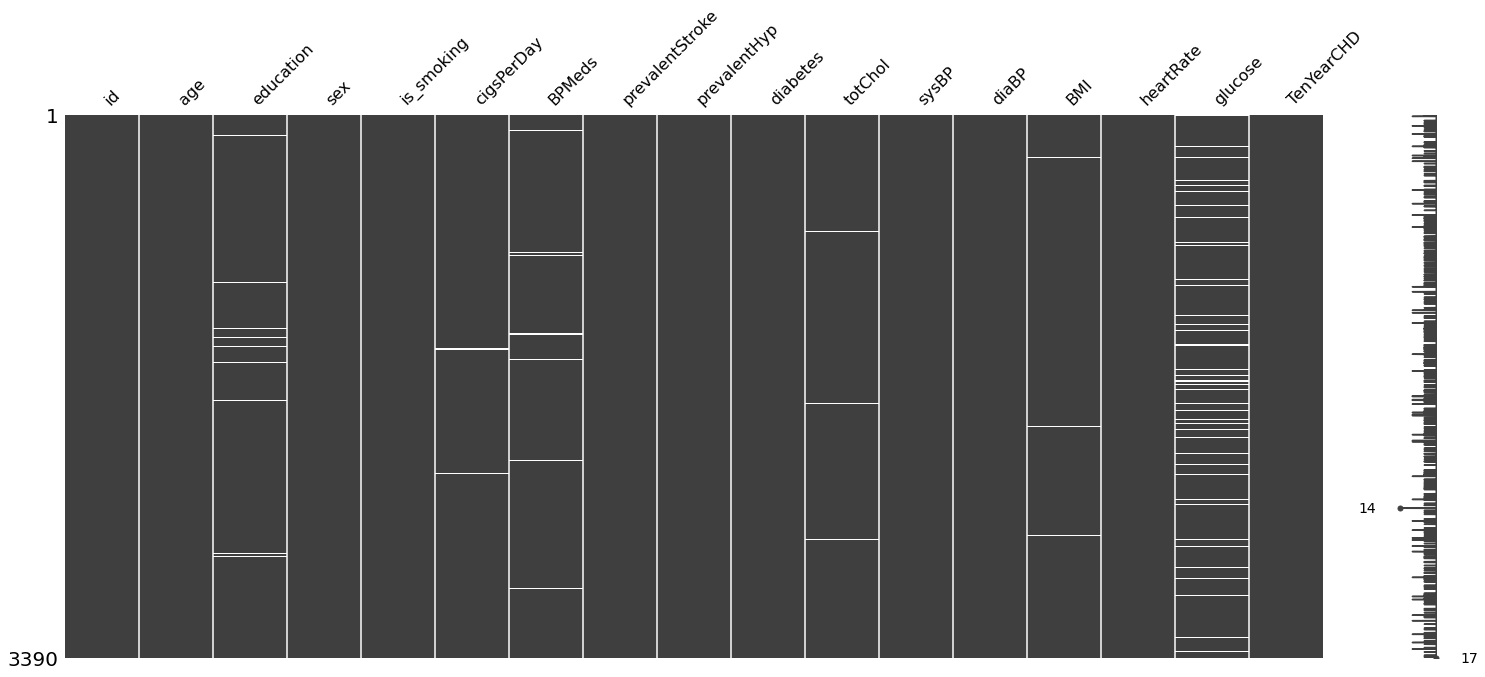

In [ ]:
# heat matrix for missing values
fig = msno.matrix(cardio_df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png', bbox_inches = 'tight')

While horizontal lines in the bar of respective variable shows the presence of missing values. Glucose, Education, BPMeds, cigsPerday, totCol etc. columns have presence of missing values.

In [ ]:
#Calculating the percentage of NULL of values in each column
total = cardio_df.isnull().sum().sort_values(ascending=False)
percent = (cardio_df.isnull().sum()/cardio_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
glucose,304,8.967552
education,87,2.566372
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499
TenYearCHD,0,0.000000
age,0,0.000000
sex,0,0.000000


In [ ]:
#Checking for duplicate records
len(cardio_df[cardio_df.duplicated()])

0

There are no duplicate records.

## **Handling missing values using KNN imputer**

**For numeric variable:**
Each missing value is imputed using average of n nearest neighbour values of that particular variable.

**For categorical variable:**
Missing values for categorical feature are replaced with 'Most Frequent' value for that particular variable.

In [ ]:
#Importing KNN Imputer
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform",metric='nan_euclidean')

In [ ]:
#Filling missing values for all numeric variables with average of 3 nearest neighbors

cardio_df['heartRate'] = knn_imputer.fit_transform(cardio_df[['heartRate']])

cardio_df['glucose'] = knn_imputer.fit_transform(cardio_df[['glucose']])

cardio_df['totChol'] = knn_imputer.fit_transform(cardio_df[['totChol']])

cardio_df['BMI'] = knn_imputer.fit_transform(cardio_df[['BMI']])

cardio_df['cigsPerDay'] = knn_imputer.fit_transform(cardio_df[['cigsPerDay']])

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [ ]:
#Filling missing values in categorical variables with most frequent value fot that variable
cardio_df['education'] = imp.fit_transform(cardio_df[['education']])

cardio_df['BPMeds'] = imp.fit_transform(cardio_df[['BPMeds']])

In [ ]:
#Calculating the percentage of NULL of values in each column after handling missing values
total = cardio_df.isnull().sum().sort_values(ascending=False)
percent = (cardio_df.isnull().sum()/cardio_df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
TenYearCHD,0,0.0
prevalentStroke,0,0.0
age,0,0.0
education,0,0.0
sex,0,0.0
is_smoking,0,0.0
cigsPerDay,0,0.0
BPMeds,0,0.0
prevalentHyp,0,0.0
glucose,0,0.0


## **Exploratory Data Analysis**

In [ ]:
cardio_df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1


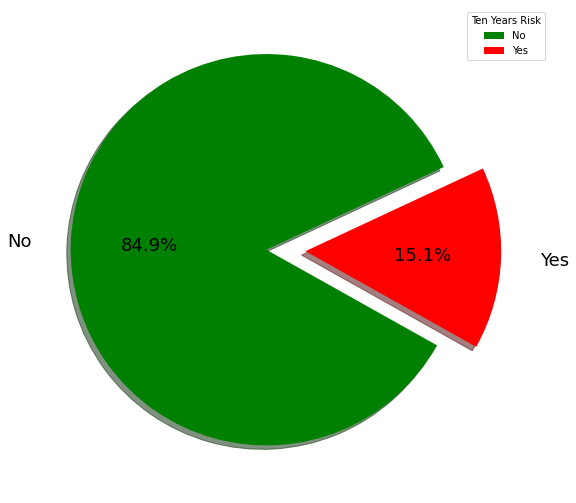

In [ ]:
#Visualizing Target Variable i.e. class proportion
my_labels = ['No','Yes']
my_explode = [0.2,0]
my_colors = ['green','red']
sizes = cardio_df['TenYearCHD'].value_counts()
fig = plt.figure(1, figsize=(9,9))
plt.pie(sizes,labels = my_labels,explode = my_explode,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25,shadow = True,pctdistance = 0.6,textprops={'fontsize': 18} )
plt.legend(title = 'Ten Years Risk')
fig.savefig('Ten Years Risk.png')
plt.show()

84.9% records belong to class 'No' and only 15.1% records belong to class 'Yes'. This shows that the dataset is imbalanced in terms of class poportion and this needs to be taken care while splitting the dataset into train-test and training the models.

**Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


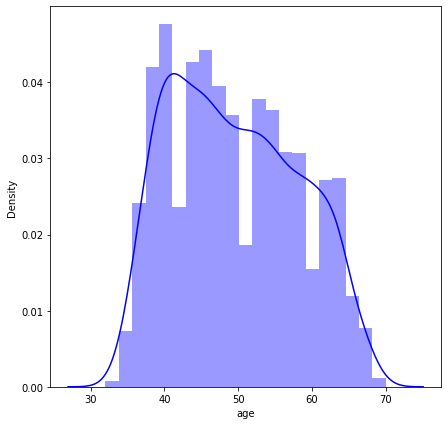

In [ ]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['age'],color="b")

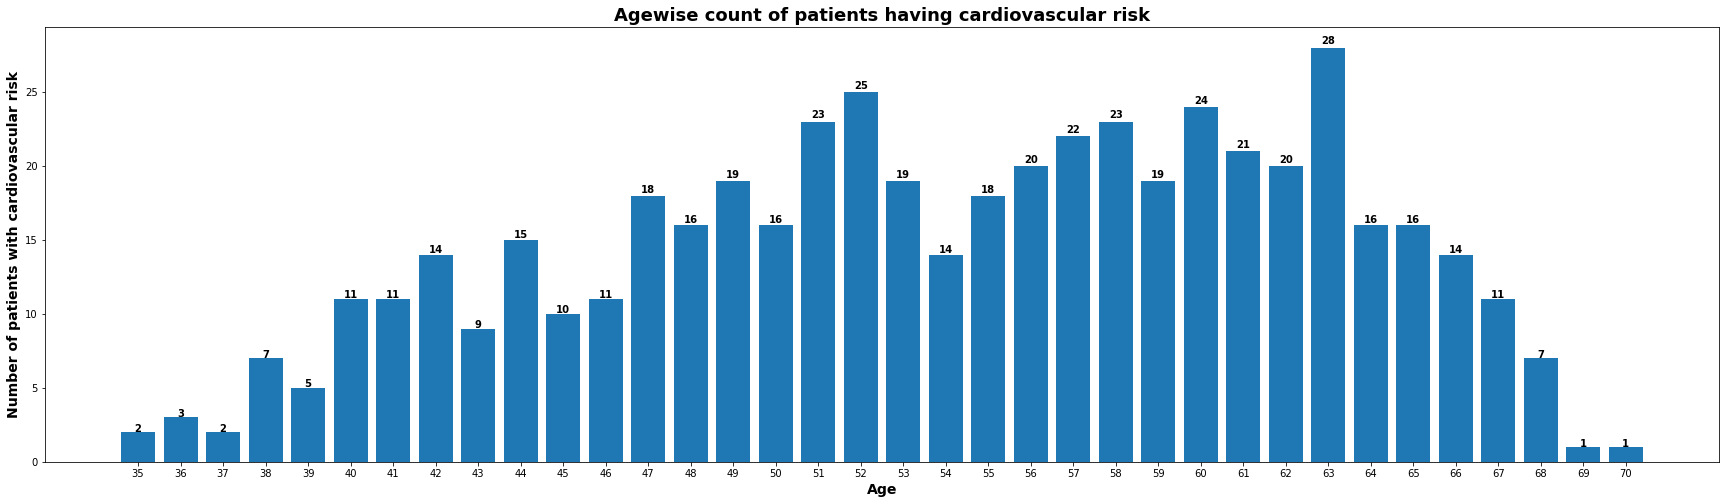

In [ ]:
#Visualization: Agewise count of patients having cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('age')['id'].count().reset_index()

plt.figure(figsize=(30,8))
graph = plt.bar(data['age'], data['id'])

plt.title('Agewise count of patients having cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Age', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['age'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

**Education**

There is no decsreption provided for the values in 'Education', considering them as level of education. '1' being lowest level of eduaction and '4' being heighest level of education.

In [ ]:
cardio_df['education'].unique()

array([2., 4., 1., 3.])

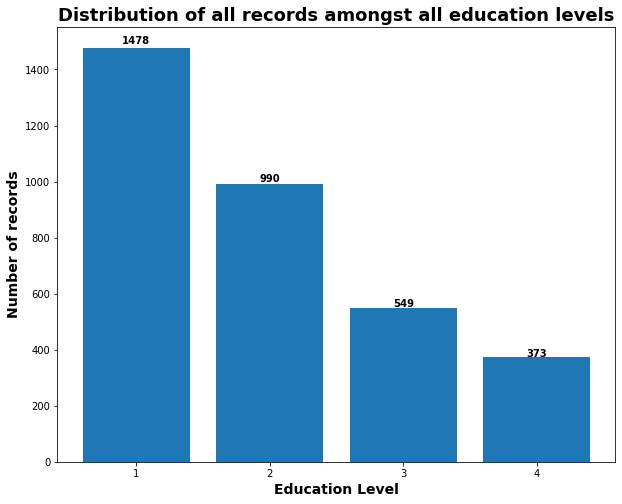

In [ ]:
#Distribution of all records amongst all education levels
data= cardio_df.groupby('education')['id'].count().reset_index()

plt.figure(figsize=(10,8))
graph = plt.bar(data['education'], data['id'])

plt.title('Distribution of all records amongst all education levels', weight='bold', fontsize= 18)
plt.xlabel('Education Level', weight='bold', fontsize= 14)
plt.ylabel('Number of records', weight='bold', fontsize= 14)
plt.xticks(data['education'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

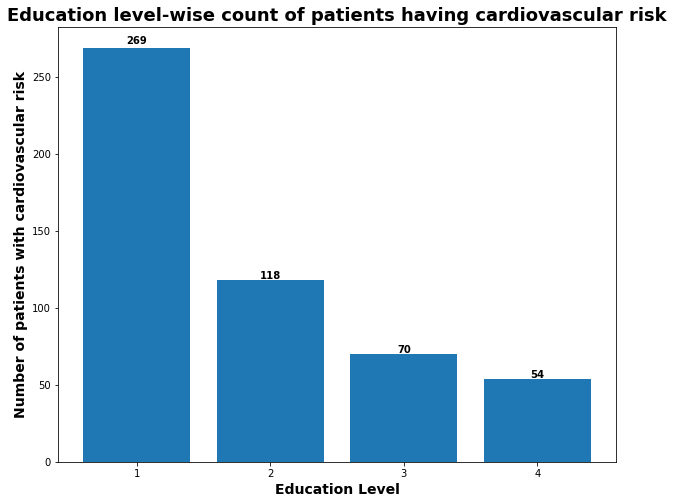

In [ ]:
#Visualization: Education level-wise count of patients having cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('education')['id'].count().reset_index()

plt.figure(figsize=(10,8))
graph = plt.bar(data['education'], data['id'])

plt.title('Education level-wise count of patients having cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Education Level', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['education'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

The prevalnce of risk as per education level is in proportion with the number of records in each education level.

 **Gender**

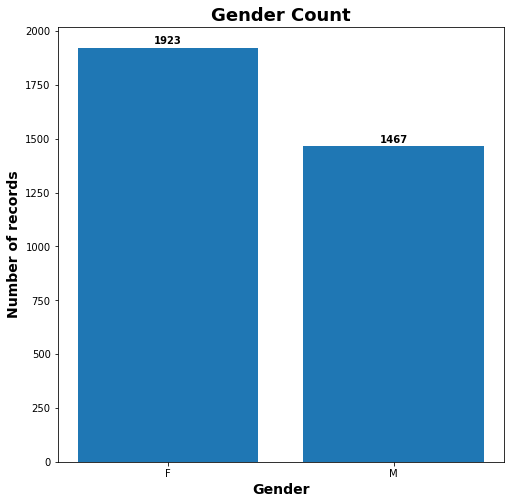

In [ ]:
#Gender Count
data= cardio_df.groupby('sex')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['sex'], data['id'])

plt.title('Gender Count', weight='bold', fontsize= 18)
plt.xlabel('Gender', weight='bold', fontsize= 14)
plt.ylabel('Number of records', weight='bold', fontsize= 14)
plt.xticks(data['sex'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

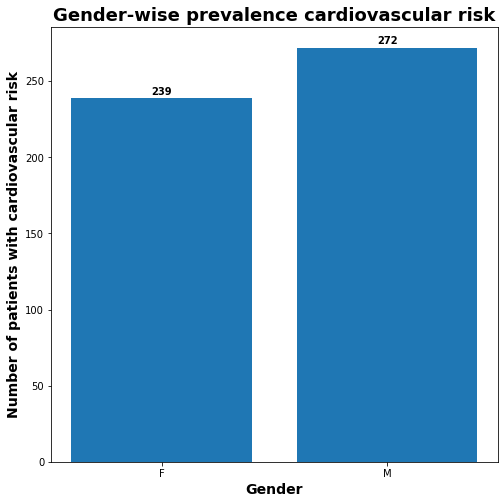

In [ ]:
#Visualization: Gender-wise prevalence cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('sex')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['sex'], data['id'])

plt.title('Gender-wise prevalence cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Gender', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['sex'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

The count of females in overall data is higher than males, but prevalnce of risk is higher in males.

**Smoking Habit**

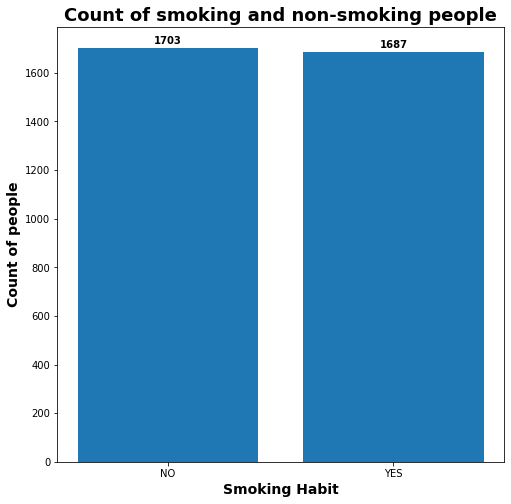

In [ ]:
#How many smokers?
data= cardio_df.groupby('is_smoking')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['is_smoking'], data['id'])

plt.title('Count of smoking and non-smoking people', weight='bold', fontsize= 18)
plt.xlabel('Smoking Habit', weight='bold', fontsize= 14)
plt.ylabel('Count of people', weight='bold', fontsize= 14)
plt.xticks(data['is_smoking'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

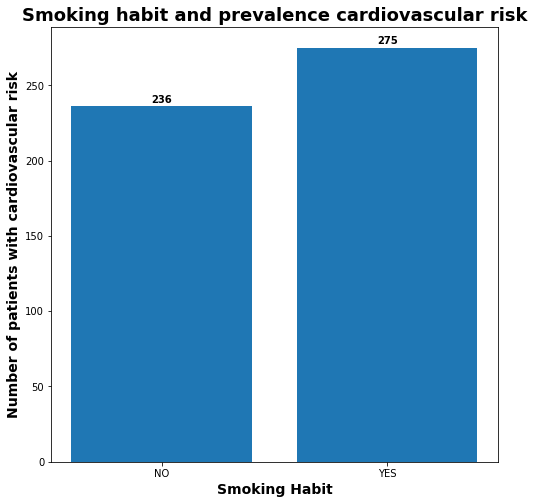

In [ ]:
#Visualization: Smoking habit and prevalence cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('is_smoking')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['is_smoking'], data['id'])

plt.title('Smoking habit and prevalence cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Smoking Habit', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['is_smoking'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

There is almost equal proportion of smokers and non-smokers, but cardiovascular risk is prevelant in people who have smoking habits

**Number of cigarettes per day**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


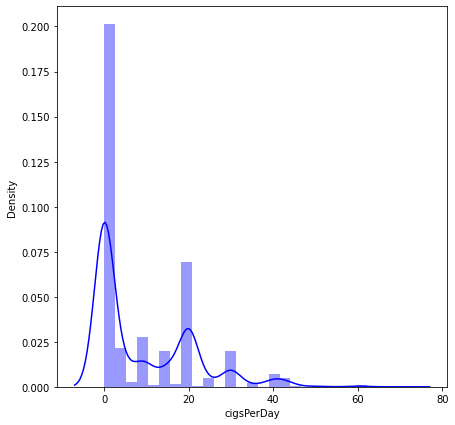

In [ ]:
#Distribution of varibable cigsPerDay
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['cigsPerDay'],color="b")

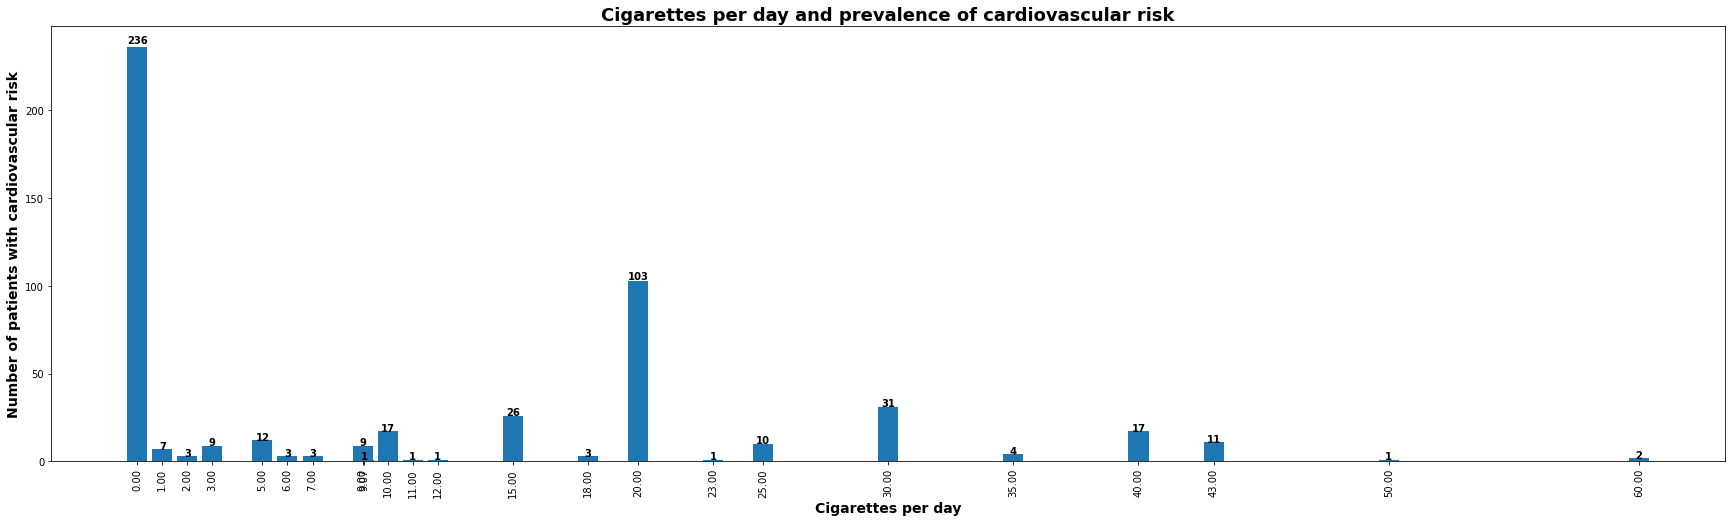

In [ ]:
#Visualization: Cigarettes per day and prevalence of cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('cigsPerDay')['id'].count().reset_index()

plt.figure(figsize=(30,8))
graph = plt.bar(data['cigsPerDay'], data['id'])

plt.title('Cigarettes per day and prevalence of cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Cigarettes per day', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['cigsPerDay'], rotation=90)
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

Cigarettes per day and risk prevalence does not show any correlation as highest number of people having cardiovascular risk are non-smokers and there are only two people have risk of cardiovascular risk who smoke 60 (highest) cigarettes. 

**BP Medicines**

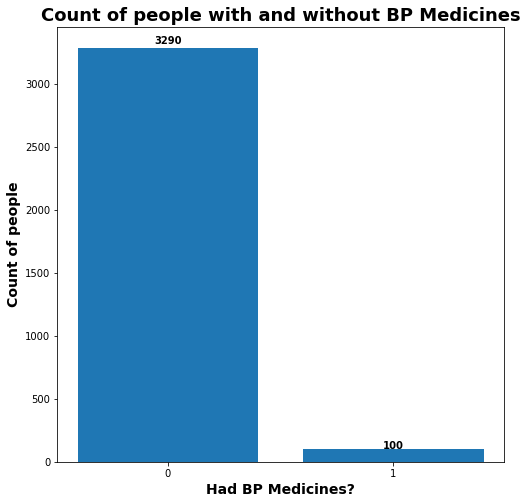

In [ ]:
#Count of people with and without BP Medicines
data= cardio_df.groupby('BPMeds')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['BPMeds'], data['id'])

plt.title('Count of people with and without BP Medicines', weight='bold', fontsize= 18)
plt.xlabel('Had BP Medicines?', weight='bold', fontsize= 14)
plt.ylabel('Count of people', weight='bold', fontsize= 14)
plt.xticks(data['BPMeds'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

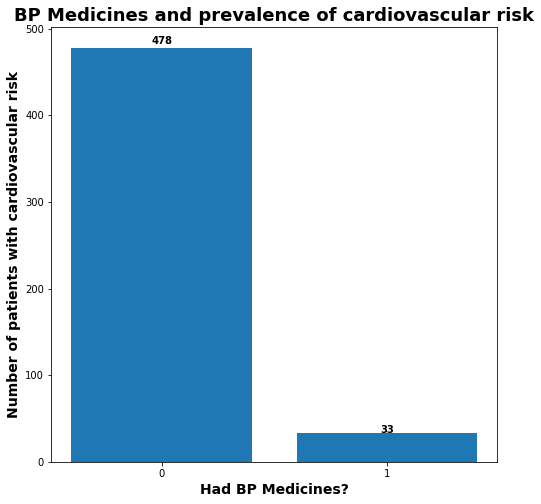

In [ ]:
#Visualization: BP Medicines and prevalence of cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('BPMeds')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['BPMeds'], data['id'])

plt.title('BP Medicines and prevalence of cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Had BP Medicines?', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['BPMeds'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

In [ ]:
# had not taken BP Mediction
BP = cardio_df[cardio_df['BPMeds'] == 0.0]
BP = BP.groupby('TenYearCHD').agg({'BPMeds':'count'}).rename(columns ={"BPMeds":'not_taken_medication'})
BP['percent'] = (BP['not_taken_medication'] / BP['not_taken_medication'].sum()) * 100
BP

,not_taken_medication,percent
TenYearCHD,,
0,2812,85.471125
1,478,14.528875


In [ ]:
# had BP Mediction
BP = cardio_df[cardio_df['BPMeds'] == 1.0]
BP = BP.groupby('TenYearCHD').agg({'BPMeds':'count'})
BP['percent'] = (BP['BPMeds'] / BP['BPMeds'].sum()) * 100
BP

,BPMeds,percent
TenYearCHD,,
0,67,67.0
1,33,33.0


There are only 100 people who had BP medicines and all others were not having any BP medicine, thus it is diffuclt to meke any generalized statement about BP medicines and prevalance of cardiovascular risk.

**Stroke History**

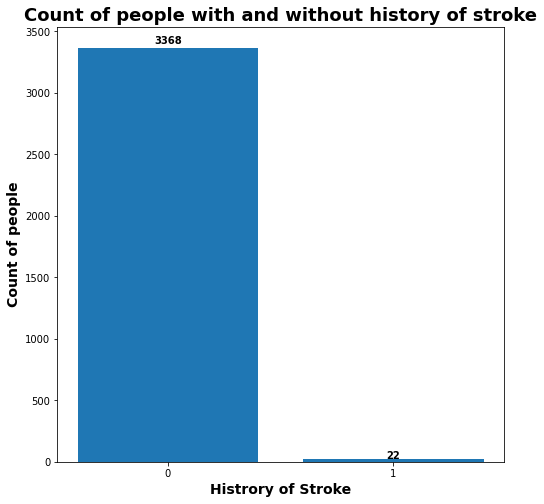

In [ ]:
#Count of people with and without history of stroke
data= cardio_df.groupby('prevalentStroke')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['prevalentStroke'], data['id'])

plt.title('Count of people with and without history of stroke', weight='bold', fontsize= 18)
plt.xlabel('Histrory of Stroke', weight='bold', fontsize= 14)
plt.ylabel('Count of people', weight='bold', fontsize= 14)
plt.xticks(data['prevalentStroke'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

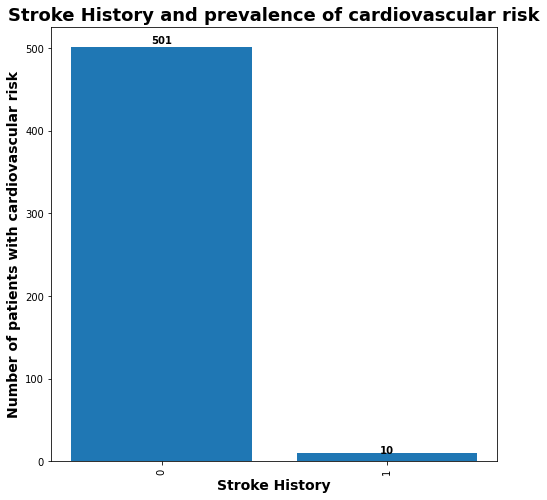

In [ ]:
#Visualization: Stroke History and prevalence of cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('prevalentStroke')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['prevalentStroke'], data['id'])

plt.title('Stroke History and prevalence of cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Stroke History', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['prevalentStroke'], rotation=90)
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

In [ ]:
#People with no stroke history
stroke = cardio_df[cardio_df['prevalentStroke'] == 0.0]
stroke = stroke.groupby('TenYearCHD').agg({'prevalentStroke':'count'}).rename(columns ={"prevalentStroke":'no_Stroke_History'})
stroke['percent'] = (stroke['no_Stroke_History'] / stroke['no_Stroke_History'].sum()) * 100
stroke

,no_Stroke_History,percent
TenYearCHD,,
0,2867,85.124703
1,501,14.875297


In [ ]:
#People with stroke history
stroke = cardio_df[cardio_df['prevalentStroke'] == 1.0]
stroke = stroke.groupby('TenYearCHD').agg({'prevalentStroke':'count'}).rename(columns ={"prevalentStroke":'with_Stroke_History'})
stroke['percent'] = (stroke['with_Stroke_History'] / stroke['with_Stroke_History'].sum()) * 100
stroke

,with_Stroke_History,percent
TenYearCHD,,
0,12,54.545455
1,10,45.454545


The sample size of people with stroke histrory is very small as compred to people without any stroke history, thus unable to come up with any generalizable conclusion about the corelation between stroke history and prevalnece of cardiovascular risk.

**Hypertension History**

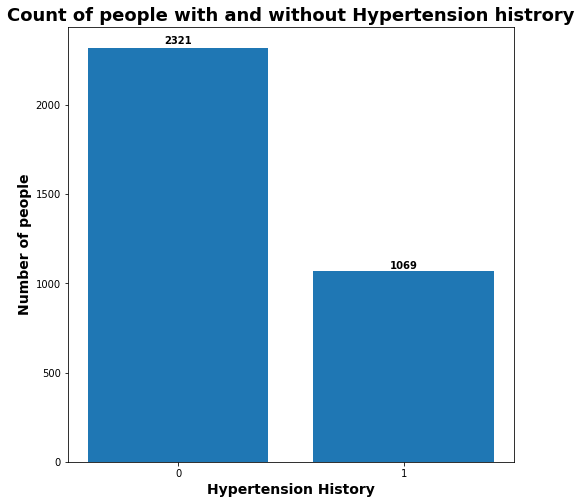

In [ ]:
#Count of people with and without Hypertension histrory
data= cardio_df.groupby('prevalentHyp')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['prevalentHyp'], data['id'])

plt.title('Count of people with and without Hypertension histrory', weight='bold', fontsize= 18)
plt.xlabel('Hypertension History', weight='bold', fontsize= 14)
plt.ylabel('Number of people', weight='bold', fontsize= 14)
plt.xticks(data['prevalentHyp'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

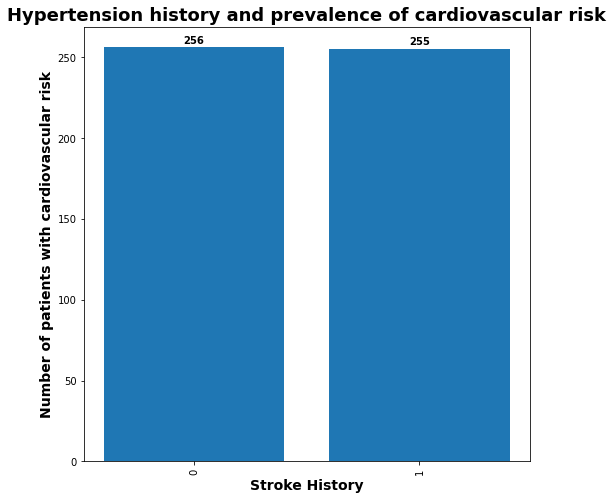

In [ ]:
#Visualization: Hypertension history and prevalence of cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('prevalentHyp')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['prevalentHyp'], data['id'])

plt.title('Hypertension history and prevalence of cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Hypertension History', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['prevalentHyp'], rotation=90)
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

In [ ]:
#People with no hypertension history
hyper = cardio_df[cardio_df['prevalentHyp'] == 0.0]
hyper = hyper.groupby('TenYearCHD').agg({'prevalentHyp':'count'}).rename(columns ={"prevalentHyp":'no_Hypertension_History'})
hyper['percent'] = (hyper['no_Hypertension_History'] / hyper['no_Hypertension_History'].sum()) * 100
hyper

,no_Hypertension_History,percent
TenYearCHD,,
0,2065,88.970271
1,256,11.029729


In [ ]:
#People with hypertension history
hyper = cardio_df[cardio_df['prevalentHyp'] == 1.0]
hyper = hyper.groupby('TenYearCHD').agg({'prevalentHyp':'count'}).rename(columns ={"prevalentHyp":'with_Hypertension_History'})
hyper['percent'] = (hyper['with_Hypertension_History'] / hyper['with_Hypertension_History'].sum()) * 100
hyper

,with_Hypertension_History,percent
TenYearCHD,,
0,814,76.145931
1,255,23.854069


Inspite of unequal number of people with and without hypertension history, it can be seen that cardiovascular risk for people with hypertension history is on higher side as compared with people with no history of hypertension.

**Diabetes History**

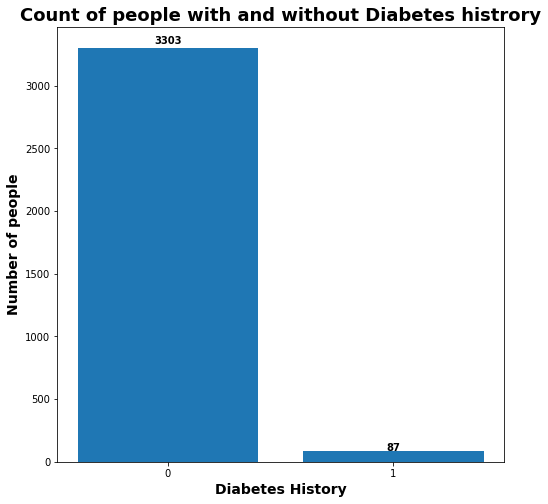

In [ ]:
#Count of people with and without Diabetes histrory
data= cardio_df.groupby('diabetes')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['diabetes'], data['id'])

plt.title('Count of people with and without Diabetes histrory', weight='bold', fontsize= 18)
plt.xlabel('Diabetes History', weight='bold', fontsize= 14)
plt.ylabel('Number of people', weight='bold', fontsize= 14)
plt.xticks(data['diabetes'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

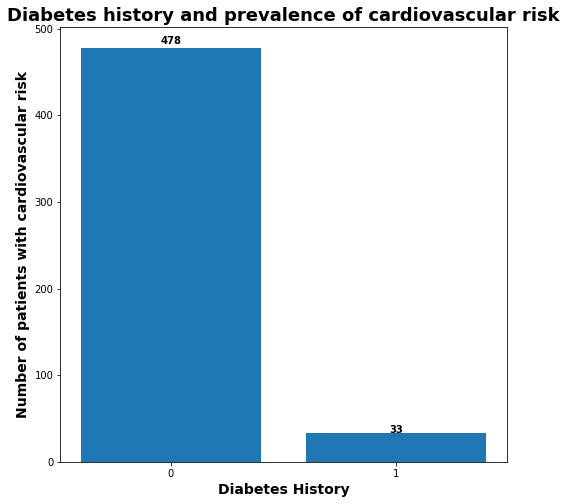

In [ ]:
#Visualization: Diabetes history and prevalence of cardiovascular risk

data= cardio_df[cardio_df['TenYearCHD']==1]
data= data.groupby('diabetes')['id'].count().reset_index()

plt.figure(figsize=(8,8))
graph = plt.bar(data['diabetes'], data['id'])

plt.title('Diabetes history and prevalence of cardiovascular risk', weight='bold', fontsize= 18)
plt.xlabel('Diabetes History', weight='bold', fontsize= 14)
plt.ylabel('Number of patients with cardiovascular risk', weight='bold', fontsize= 14)
plt.xticks(data['diabetes'])
labels= []
for item in data['id']:
  labels.append(item)

i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(labels[i]),
             ha='center',
             weight='bold', fontsize=10)
    i+=1

In [ ]:
#People with no diabetes history
diabetic = cardio_df[cardio_df['diabetes'] == 0.0]
diabetic = diabetic.groupby('TenYearCHD').agg({'diabetes':'count'}).rename(columns ={"diabetes":'no_Diabetes_History'})
diabetic['percent'] = (diabetic['no_Diabetes_History'] / diabetic['no_Diabetes_History'].sum()) * 100
diabetic

,no_Diabetes_History,percent
TenYearCHD,,
0,2825,85.528308
1,478,14.471692


In [ ]:
#People with diabetes history
diabetic = cardio_df[cardio_df['diabetes'] == 1.0]
diabetic = diabetic.groupby('TenYearCHD').agg({'diabetes':'count'}).rename(columns ={"diabetes":'with_Diabetes_History'})
diabetic['percent'] = (diabetic['with_Diabetes_History'] / diabetic['with_Diabetes_History'].sum()) * 100
diabetic

,with_Diabetes_History,percent
TenYearCHD,,
0,54,62.068966
1,33,37.931034


There are only 87 people with diabetes histrory, thus, difficult to make any generalized conclusion.

**Cholesterol Level**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


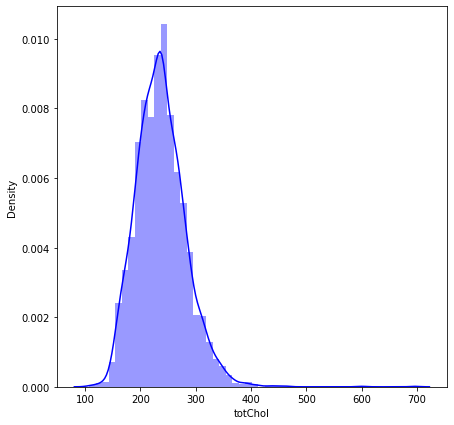

In [ ]:
#Distribution of varibable totChol
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['totChol'],color="b")

Text(0.5, 1.0, 'Cholestrol level and prevalance of Cardiovascular risk')

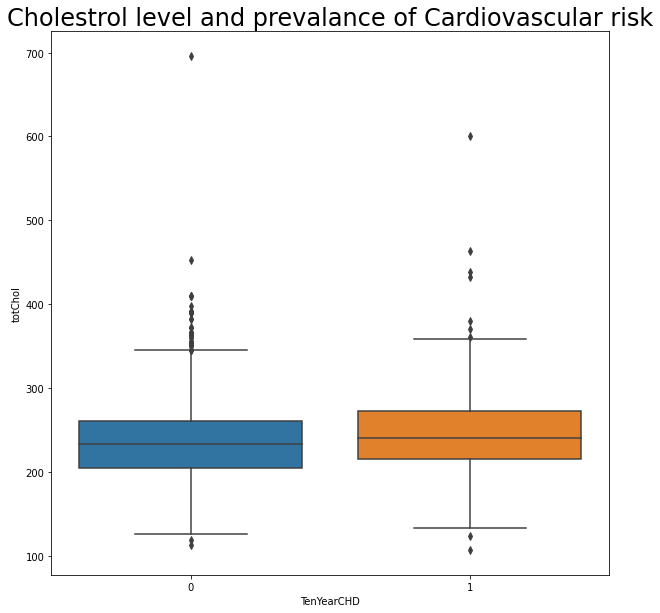

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="TenYearCHD", y="totChol", data=cardio_df)
ax.set_title( "Cholestrol level and prevalance of Cardiovascular risk" , size = 24 )

Overall mean cholestorl level for people with cardiovascular risk is slightly higher than the mean cholestrol level for people without cardiovascular risk. Although there are multiple outliers beyond maximum in people with very high cholestorl level but do not have cardiovascular risk.

**Sistolic Blood Pressure**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


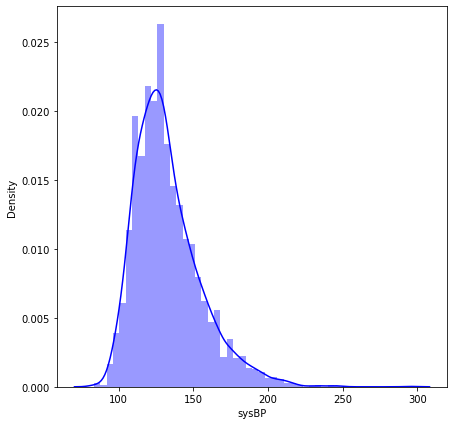

In [ ]:
#Distribution of varibable sysBP
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['sysBP'],color="b")

Text(0.5, 1.0, 'Systolic BP and prevalance of Cardiovascular risk')

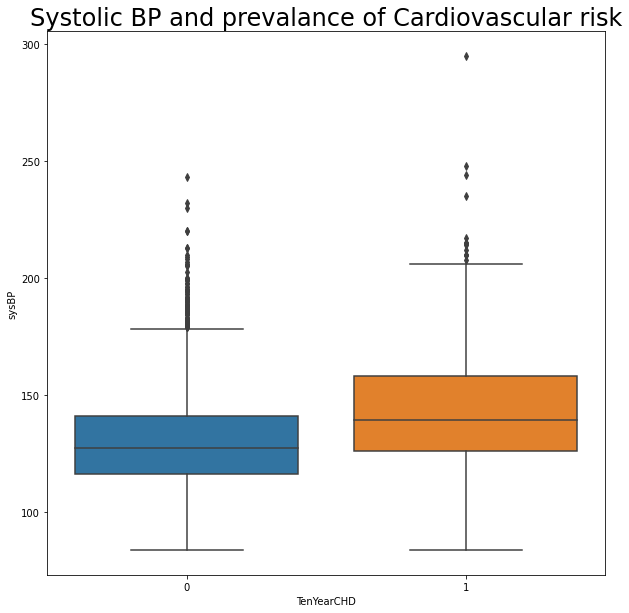

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="TenYearCHD", y="sysBP", data=cardio_df)
ax.set_title( "Systolic BP and prevalance of Cardiovascular risk" , size = 24 )

Overall mean systolic blood pressure level for people with cardiovascular risk is slightly higher than the mean systolic blood pressure level for people without cardiovascular risk. Although there are multiple outliers beyond maximum in people with very high systolic blood pressure level but do not have cardiovascular risk.

**Diastolic Blood Pressure**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


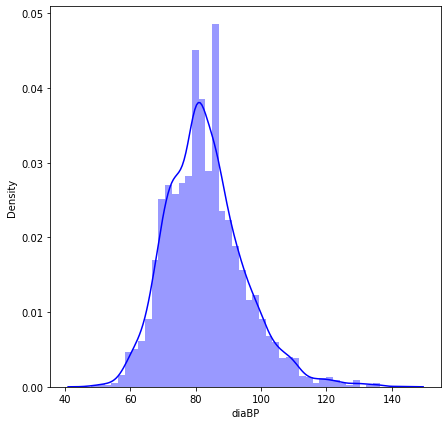

In [ ]:
#Distribution of varibable sysBP
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['diaBP'],color="b")

Text(0.5, 1.0, 'Diastolic BP and prevalance of Cardiovascular risk')

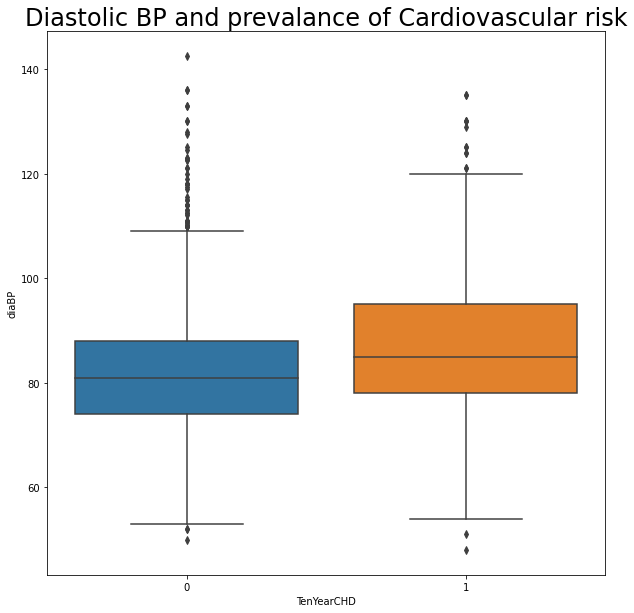

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="TenYearCHD", y="diaBP", data=cardio_df)
ax.set_title( "Diastolic BP and prevalance of Cardiovascular risk" , size = 24 )

Overall mean diastolic blood pressure level for people with cardiovascular risk is slightly higher than the mean diastolic blood pressure level for people without cardiovascular risk. Although there are multiple outliers beyond maximum in people with very high diastolic blood pressure level but do not have cardiovascular risk.

**BMI**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


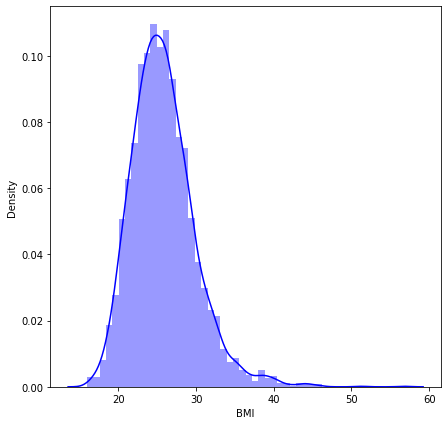

In [ ]:
#Distribution of varibable BMI
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['BMI'],color="b")

Text(0.5, 1.0, 'BMI and prevalance of Cardiovascular risk')

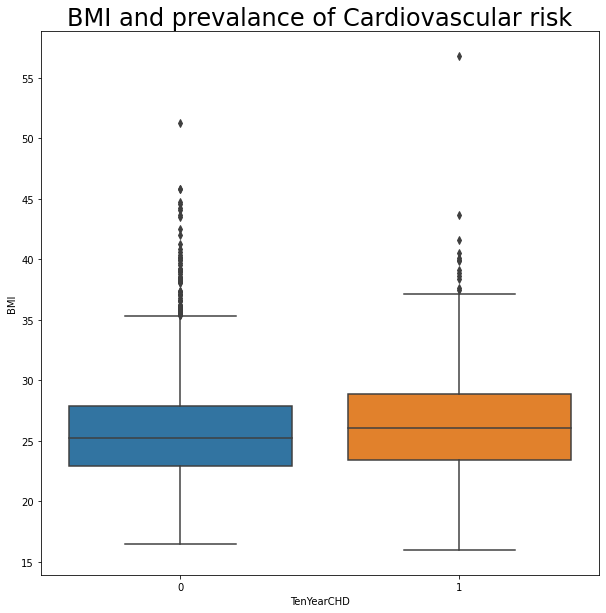

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="TenYearCHD", y="BMI", data=cardio_df)
ax.set_title( "BMI and prevalance of Cardiovascular risk" , size = 24 )

Overall mean BMI for people with cardiovascular risk is slightly higher than the mean BMI for people without cardiovascular risk. Although there are multiple outliers beyond maximum in people with very high BMI but do not have cardiovascular risk.

**Heart Rate**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


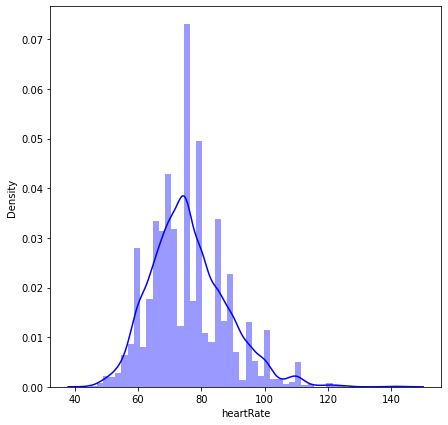

In [ ]:
#Distribution of varibable heartRate
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['heartRate'],color="b")

Text(0.5, 1.0, 'Heart Rate and prevalance of Cardiovascular risk')

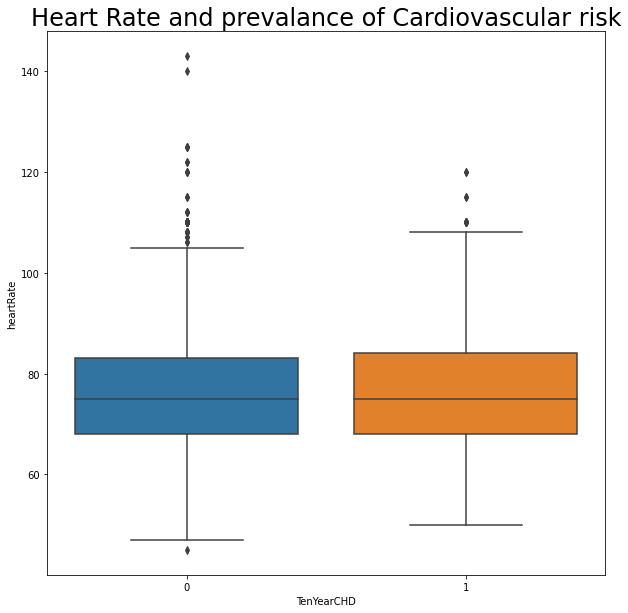

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="TenYearCHD", y="heartRate", data=cardio_df)
ax.set_title( "Heart Rate and prevalance of Cardiovascular risk" , size = 24 )

Both the means (having and not having cardivascular risk) are same, seems like the Heart Rate has very less effect on cardiovascular risk prevalence

**Glocose Level**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


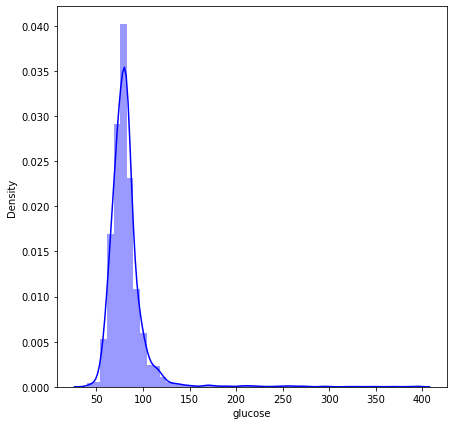

In [ ]:
#Distribution of varibable glucose
plt.figure(figsize=(7,7))
sns.distplot(cardio_df['glucose'],color="b")

Text(0.5, 1.0, 'Glucose level and prevalance of Cardiovascular risk')

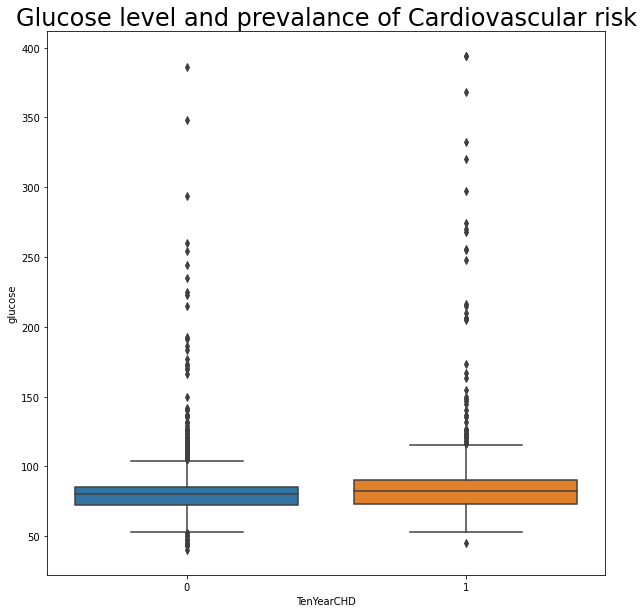

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.boxplot(x="TenYearCHD", y="glucose", data=cardio_df)
ax.set_title( "Glucose level and prevalance of Cardiovascular risk" , size = 24 )

There are too many outliers in case of both the classes.

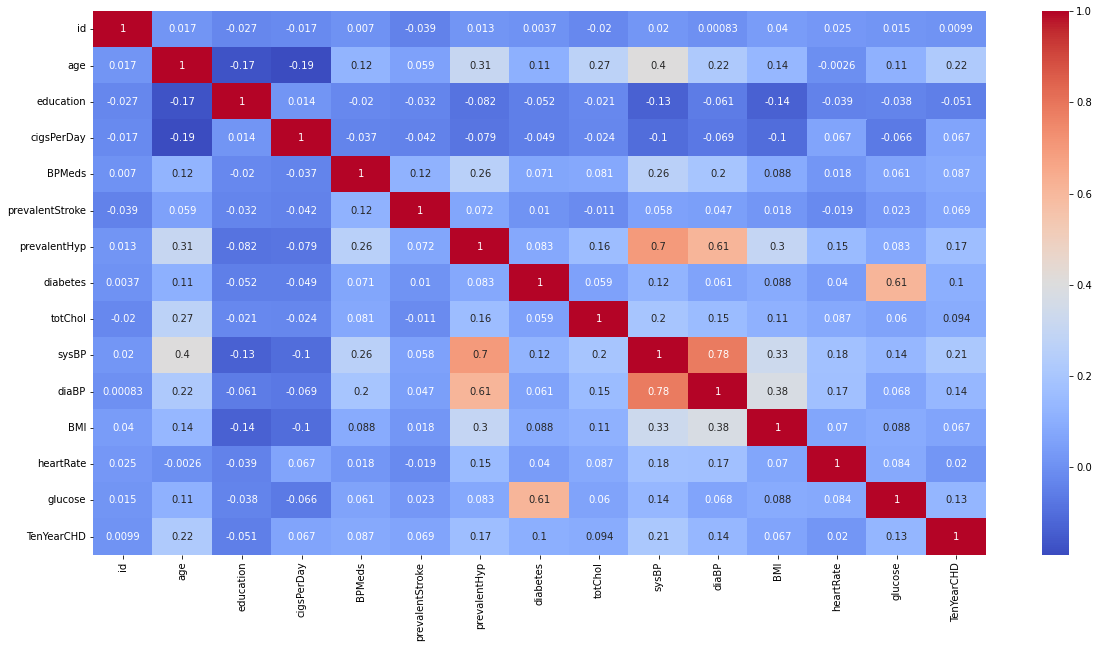

In [ ]:
#Bivariate Analysis: Corekation Matrix
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
correlation = cardio_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

There are no strong corelations between our target variable TenYearCHD (cardiovascular risk in next 10 years) and any other independent variables

In [ ]:
cardio_df.head(1)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1


In [ ]:
#Label Encoding
encoding_nums = {
            'is_smoking': {'NO': 0, 'YES':1},
          }
cardio_df= cardio_df.replace(encoding_nums)

In [ ]:
#One Hot Coding
cardio_df= pd.get_dummies(cardio_df, columns=['sex'], prefix=['Is_'])

In [ ]:
cardio_df.head()

,id,age,education,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Is__F,Is__M
0,0,64,2.0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1,1,0
1,1,36,4.0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0,0,1
2,2,46,1.0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0,1,0
3,3,50,1.0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1,0,1
4,4,64,1.0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0,1,0


**Dealing with Imbalanced Dataset**

There are multiple ways in which the imbalanced dataset can be handled, 'resampling the dataset'is one of them. Two ways of resampling are: Undersampling the majority class and oversampling the minority class. In order to reduce overfitting during oversampling, synthetic sampling is used. SMOTE (Synthetic Minority Over Sampling Technique) is one popular algorithm. Instead of using copies of observations to oversample, SMOTE varies attributes of the observations to create new synthetic samples.

In [ ]:
cardio_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
cardio_df.columns

Index(['id', 'age', 'education', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'Is__F', 'Is__M'],
      dtype='object')

In [ ]:
#Independent Variables
X= cardio_df[['age', 'education', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Is__F', 'Is__M']]

#Target Variable
y= cardio_df['TenYearCHD']

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(cardio_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Converting arrays into dataframes
X_resampled= pd.DataFrame(x_smote)
y_resampled= pd.DataFrame(y_smote)

In [ ]:
y_resampled[0].value_counts()

1    2879
0    2879
Name: 0, dtype: int64

After resampling both the dataset has been balanced and there are equal number of records belonging to both the classes.

**Training Models**
1. Logistic Regression
2. Support Vector Machine
3. Decision Tree
4. K Nearest Neighbour

In [ ]:
#Applying normalization operation for numeric stability
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X_resampled)

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_resampled , test_size=0.25, random_state=0)

In [ ]:
#Getting Ready
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test, average='weighted')
lr_recall= recall_score(lr_predictions,y_test, average='weighted')
lr_f1_score= f1_score(lr_predictions, y_test, average='weighted')

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.6777777777777778
Precision : 0.6780299250532461
Recall : 0.6777777777777778
F1 Score : 0.6778711755233495


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 1080x576 with 0 Axes>

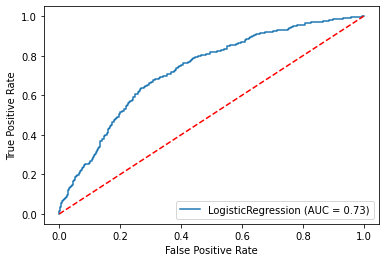

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [ ]:
#Hyperparameter Tuning for Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_lr.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 30 folds for each of 15 candidates, totalling 450 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    5.3s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:    9.4s
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:   12.5s


Best: 0.682245 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=10)]: Done 450 out of 450 | elapsed:   16.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lr_predictions= grid_search_lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test, average='weighted')
lr_recall= recall_score(lr_predictions,y_test, average='weighted')
lr_f1_score= f1_score(lr_predictions, y_test, average='weighted')

print('Performance of Logistic Regression Classifier after hyperparameter tuning')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier after hyperparameter tuning
Accuracy : 0.6819444444444445
Precision : 0.6824373655438065
Recall : 0.6819444444444445
F1 Score : 0.682106758152575


<Figure size 1080x576 with 0 Axes>

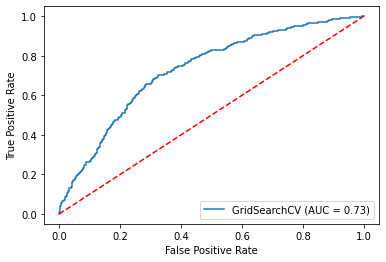

In [ ]:

plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm_predictions= svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test, average='weighted')
svm_recall= recall_score(svm_predictions,y_test, average='weighted')
svm_f1_score= f1_score(svm_predictions, y_test, average='weighted')

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Performance of Support Vector Machine Classifier
Accuracy : 0.78125
Precision : 0.7823068659166628
Recall : 0.78125
F1 Score : 0.7812047409209353


<Figure size 1080x576 with 0 Axes>

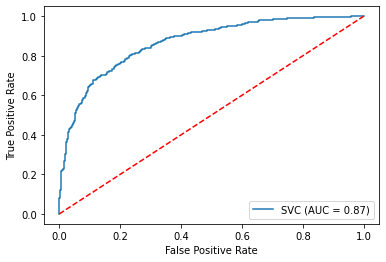

In [ ]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [ ]:
#Hyperparameter tuning for SVM
kernel = ['rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_svm.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 30 folds for each of 10 candidates, totalling 300 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   17.3s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 268 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 300 out of 300 | elapsed:  3.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.847688 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
svm_predictions= grid_search_svm.predict(X_test)

#Performance Metrics
svm_accuracy= accuracy_score(svm_predictions,y_test)
svm_precision= precision_score(svm_predictions,y_test, average='weighted')
svm_recall= recall_score(svm_predictions,y_test, average='weighted')
svm_f1_score= f1_score(svm_predictions, y_test, average='weighted')

print('Performance of Support Vector Machine Classifier after hyperparameter tuning')
print('Accuracy :' , svm_accuracy)
print('Precision :', svm_precision)
print('Recall :', svm_recall)
print('F1 Score :', svm_f1_score)

Performance of Support Vector Machine Classifier after hyperparameter tuning
Accuracy : 0.8583333333333333
Precision : 0.8585230875702123
Recall : 0.8583333333333333
F1 Score : 0.858293962038867


<Figure size 1080x576 with 0 Axes>

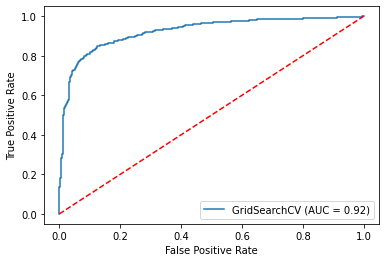

In [ ]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_svm,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dTree= DecisionTreeClassifier()
dTree.fit(X_train,y_train)
dTree_predictions= dTree.predict(X_test)

#Performance Metrics
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test, average='weighted')
dTree_recall= recall_score(dTree_predictions,y_test, average='weighted')
dTree_f1_score= f1_score(dTree_predictions, y_test, average='weighted')

print('Performance of Support Vector Machine Classifier')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

Performance of Support Vector Machine Classifier
Accuracy : 0.8145833333333333
Precision : 0.8150146057650522
Recall : 0.8145833333333333
F1 Score : 0.8146854011215445


<Figure size 1080x576 with 0 Axes>

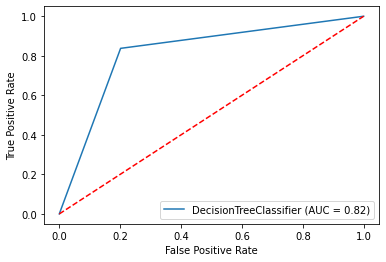

In [ ]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(dTree,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [ ]:
#Hyperparameter tuning for decision tree classifier

# Creating a dictionary of all the parameter options 
parameters = {'criterion': ['gini', 'entropy'],
                  'max_depth': range(1,10),
                 # 'min_samples_split': range(1,10),
              #'min_samples_leaf': range(1,5),
              #'random_state': '42'
              'max_features': range(1,11)
              }

# Creating a grid search object
grid_search_dTree = GridSearchCV(estimator=dTree, param_grid=parameters, n_jobs=-1, cv=10, verbose=3)

# Fitting the grid search
grid_search_dTree.fit(X_train, y_train)
# Viewing The Best Parameters
print('Best Parameters:', grid_search_dTree.best_estimator_.get_params())


Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 380 tasks      | elapsed:    2.1s


Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 9, 'max_features': 10, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   13.9s finished


In [ ]:
grid_search_dTree.best_params_

{'criterion': 'gini', 'max_depth': 9, 'max_features': 10}

In [ ]:
dTree_predictions= grid_search_dTree.predict(X_test)

#Performance Metrics
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test, average='weighted')
dTree_recall= recall_score(dTree_predictions,y_test, average='weighted')
dTree_f1_score= f1_score(dTree_predictions, y_test, average='weighted')

print('Performance of Decision Tree Classifier after hyperparameter tuning')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

Performance of Decision Tree Classifier after hyperparameter tuning
Accuracy : 0.8125
Precision : 0.8195071459610834
Recall : 0.8125
F1 Score : 0.8128257722007723


<Figure size 1080x576 with 0 Axes>

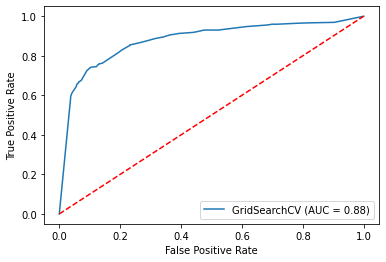

In [ ]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_dTree,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**K Nearest Neighbor Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test, average='weighted')
knn_recall= recall_score(knn_predictions,y_test, average='weighted')
knn_f1_score= f1_score(knn_predictions, y_test, average='weighted')

print('Performance of Random Forest Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Performance of Random Forest Classifier
Accuracy : 0.8104166666666667
Precision : 0.8314726473854475
Recall : 0.8104166666666667
F1 Score : 0.8129861207620886


<Figure size 1080x576 with 0 Axes>

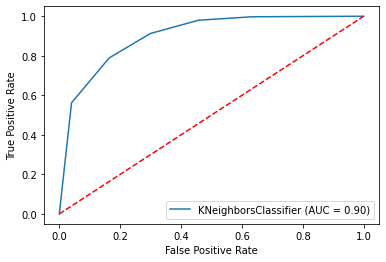

In [ ]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [ ]:
#Hyperparameter tuning for KNN Classifier
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid_search_knn = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  

# Fitting the grid search
grid_search_knn.fit(X_train, y_train)
# Viewing The Best Parameters
print('Best Parameters:', grid_search_knn.best_estimator_.get_params())

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selec

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}


In [ ]:
knn_predictions= grid_search_knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test, average='weighted')
knn_recall= recall_score(knn_predictions,y_test, average='weighted')
knn_f1_score= f1_score(knn_predictions, y_test, average='weighted')

print('Performance of Random Forest Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of Random Forest Classifier
Accuracy : 0.8722222222222222
Precision : 0.8724978674778299
Recall : 0.8722222222222222
F1 Score : 0.8722775441200727


In [ ]:
#Comparing Performance of all classifiers

models = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machines', 'K Nearest Neighbour', 'Logistic Regression'],
    'Accuracy': [dTree_accuracy, svm_accuracy, knn_accuracy, lr_accuracy],
    'Precision': [dTree_precision, svm_precision, knn_precision, lr_precision],
    'Recall': [dTree_recall, svm_recall, knn_recall, lr_recall],
    'F1 Score': [dTree_f1_score, svm_f1_score, knn_f1_score, lr_f1_score]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall,F1 Score
2,K Nearest Neighbour,0.872222,0.872498,0.872222,0.872278
1,Support Vector Machines,0.858333,0.858523,0.858333,0.858294
0,Decision Tree,0.812500,0.819507,0.812500,0.812826
3,Logistic Regression,0.681944,0.682437,0.681944,0.682107


**The K Nearest Neighbor classifier has the best performance with highest accuracy of 0.87**